<a href="https://colab.research.google.com/github/rafiechautie/Autism-detector-for-children/blob/main/Machine-Learning/Capstone_Rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [220]:
import os
import random
import cv2
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import vgg16, vgg19, efficientnet, mobilenet, inception_v3
from tensorflow.keras import Model
from PIL import Image 
import matplotlib.image as mpimg
import tempfile

# Install Kaggle + Import Data


In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d cihan063/autism-image-data

 97% 222M/229M [00:03<00:00, 79.8MB/s]
100% 229M/229M [00:03<00:00, 69.5MB/s]


In [7]:
!mkdir autism

In [8]:
!unzip -qq autism-image-data.zip -d autism
!ls autism

AutismDataset


In [9]:
!ls autism/AutismDataset

consolidated  test  train  valid


In [10]:
#Base
file_dir ='autism/AutismDataset/consolidated'

# Autist and Non-Autist
autist_dir = os.path.join(file_dir, 'Autistic')
nonautist_dir = os.path.join(file_dir, 'Non_Autistic')

print('total autist:', len(os.listdir(autist_dir)))
print('total nonautist:', len(os.listdir(nonautist_dir)))

total autist: 1470
total nonautist: 1470


In [11]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Split Folders

In [12]:
import splitfolders

In [13]:
splitfolders.ratio(file_dir, '/content/autism/', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 2940 files [00:00, 6400.04 files/s]


In [107]:
train_dir ='autism/train/'
val_dir = 'autism/val'
test_dir = 'autism/test'

# Train Dir
train_autist_dir = os.path.join(train_dir, 'Autistic')
train_nonautist_dir = os.path.join(train_dir, 'Non_Autistic')
print('total training autist:', len(os.listdir(train_autist_dir)))
print('total training nonautist:', len(os.listdir(train_nonautist_dir)))

# Val Dir
val_autist_dir = os.path.join(val_dir, 'Autistic')
val_nonautist_dir = os.path.join(val_dir, 'Non_Autistic')
print('total val autist:', len(os.listdir(val_autist_dir)))
print('total val nonautist:', len(os.listdir(val_nonautist_dir)))

total training autist: 1176
total training nonautist: 1176
total val autist: 147
total val nonautist: 147


In [108]:
#for predict
original_test_dir1 = "autism/test/Autistic"
original_test_dir2 = "autism/test/Non_Autistic"
test_imgs1 = ["autism/test/Autistic/{}".format(i) for i in os.listdir(original_test_dir1)]
test_imgs2 = ["autism/test/Non_Autistic/{}".format(i) for i in os.listdir(original_test_dir2)]
test_imgs = test_imgs1 + test_imgs2
print(test_imgs)

['autism/test/Autistic/0644.jpg', 'autism/test/Autistic/1319.jpg', 'autism/test/Autistic/1400.jpg', 'autism/test/Autistic/1454.jpg', 'autism/test/Autistic/1415.jpg', 'autism/test/Autistic/1253.jpg', 'autism/test/Autistic/0817.jpg', 'autism/test/Autistic/1392.jpg', 'autism/test/Autistic/0469.jpg', 'autism/test/Autistic/0999.jpg', 'autism/test/Autistic/1432.jpg', 'autism/test/Autistic/1451.jpg', 'autism/test/Autistic/0243.jpg', 'autism/test/Autistic/0927.jpg', 'autism/test/Autistic/0886.jpg', 'autism/test/Autistic/0540.jpg', 'autism/test/Autistic/0037.jpg', 'autism/test/Autistic/0589.jpg', 'autism/test/Autistic/0215.jpg', 'autism/test/Autistic/0519.jpg', 'autism/test/Autistic/0094.jpg', 'autism/test/Autistic/0748.jpg', 'autism/test/Autistic/1239.jpg', 'autism/test/Autistic/0543.jpg', 'autism/test/Autistic/1231.jpg', 'autism/test/Autistic/0379.jpg', 'autism/test/Autistic/1362.jpg', 'autism/test/Autistic/0438.jpg', 'autism/test/Autistic/0737.jpg', 'autism/test/Autistic/0268.jpg', 'autism/t

# Pre-processing Image

In [127]:
nrows = 224
ncolumns  = 224
channels = 3

# Read and process the images: Function returns X,y. X - list of resized images, y - list of labels for the images

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

In [128]:
random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

In [129]:
list_autism = os.listdir(train_dir)

In [112]:
jumlah = 0

for x in list_autism:
  dc = os.path.join(train_dir, x)
  y = len(os.listdir(dc))
  print(x + ':', y)
  jumlah = jumlah + y

  namagbr = os.listdir(dc)
  for z in range(4):
    gbr_dc = os.path.join(dc, namagbr[z])
    gbr = Image.open(gbr_dc)
    print('ukuran', gbr.size)  
  print('/////////////////')

print('\nTotal Gambar :', jumlah)

Autistic: 1176
ukuran (568, 766)
ukuran (270, 339)
ukuran (619, 613)
ukuran (297, 369)
/////////////////
Non_Autistic: 1176
ukuran (890, 814)
ukuran (484, 512)
ukuran (225, 231)
ukuran (335, 335)
/////////////////

Total Gambar : 2352


Autistic


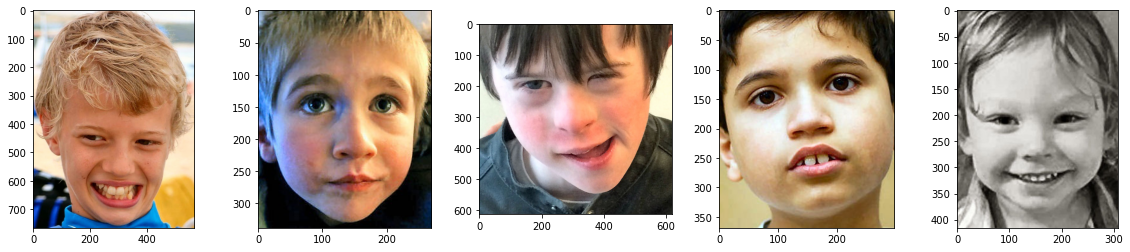

Non_Autistic


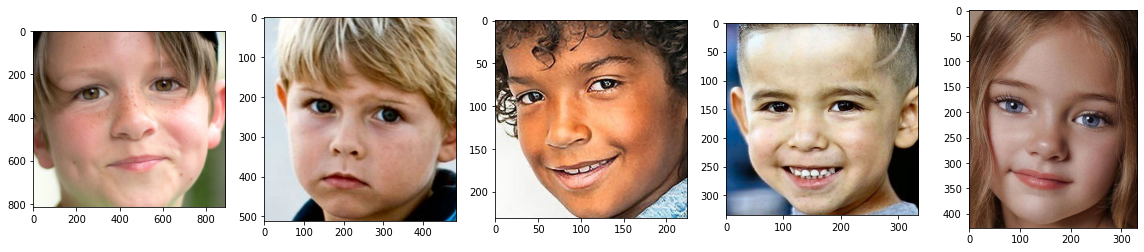

In [113]:
# check images class
for item in list_autism:
  print(item)
  class_dir = os.path.join(train_dir,item)
  class_img = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, gbr_dc in enumerate(class_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, gbr_dc))
    plt.imshow(img)
  plt.show()

# Augmentation Image

In [114]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )

val_datagen = ImageDataGenerator(
    rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=235,
)

val_generator = val_datagen.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10,
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


# Modelling

## Self-Modelling

In [115]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)        

In [116]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
es = EarlyStopping(monitor= "val_accuracy" , patience= 15, restore_best_weights=True)
mc = ModelCheckpoint(filepath="Model1_Best.h5", monitor="val_accuracy", save_best_only= True)

In [118]:
history1 = model1.fit(
    train_generator, epochs=25, verbose=2, callbacks=[es, mc], 
    validation_data=val_generator, validation_steps=10) 

Epoch 1/25
11/11 - 31s - loss: 0.6953 - accuracy: 0.5119 - val_loss: 0.6919 - val_accuracy: 0.5100 - 31s/epoch - 3s/step
Epoch 2/25
11/11 - 29s - loss: 0.6840 - accuracy: 0.5723 - val_loss: 0.6629 - val_accuracy: 0.6000 - 29s/epoch - 3s/step
Epoch 3/25
11/11 - 29s - loss: 0.6859 - accuracy: 0.5476 - val_loss: 0.6672 - val_accuracy: 0.5400 - 29s/epoch - 3s/step
Epoch 4/25
11/11 - 29s - loss: 0.6634 - accuracy: 0.6110 - val_loss: 0.6154 - val_accuracy: 0.6400 - 29s/epoch - 3s/step
Epoch 5/25
11/11 - 29s - loss: 0.6638 - accuracy: 0.6327 - val_loss: 0.8413 - val_accuracy: 0.5200 - 29s/epoch - 3s/step
Epoch 6/25
11/11 - 29s - loss: 0.6671 - accuracy: 0.5931 - val_loss: 0.6395 - val_accuracy: 0.6100 - 29s/epoch - 3s/step
Epoch 7/25
11/11 - 29s - loss: 0.6540 - accuracy: 0.6152 - val_loss: 0.6806 - val_accuracy: 0.5800 - 29s/epoch - 3s/step
Epoch 8/25
11/11 - 29s - loss: 0.6746 - accuracy: 0.5821 - val_loss: 0.6335 - val_accuracy: 0.6200 - 29s/epoch - 3s/step
Epoch 9/25
11/11 - 30s - loss: 0

In [119]:
model1.evaluate(train_generator)
model1.evaluate(val_generator)

30/30 [==============================] - 1s 44ms/step - loss: 0.6057 - accuracy: 0.6837


[0.6056867837905884, 0.6836734414100647]

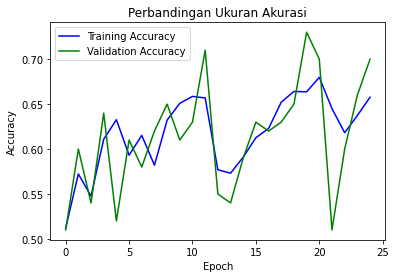

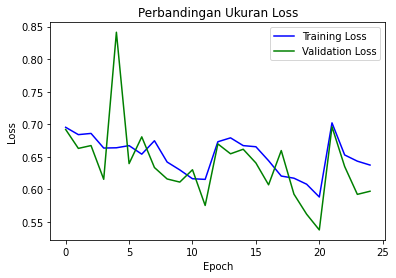

<Figure size 432x288 with 0 Axes>

In [121]:
# Plot the results
epochs = range(len(history1.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving Autistic.4.jpg to Autistic.4 (1).jpg
Autistic


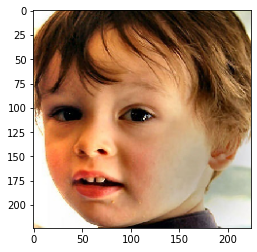

In [125]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model1.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [130]:
pred1 = model1.predict(X)
threshold = 0.5
predictions1 = np.where(pred1 > threshold, 1,0)

In [131]:
cn_matrix1= confusion_matrix(y_test, predictions1)
cn_matrix1

array([[147,   0],
       [147,   0]])

Text(0.5, 1.0, 'Confusion Matrix')

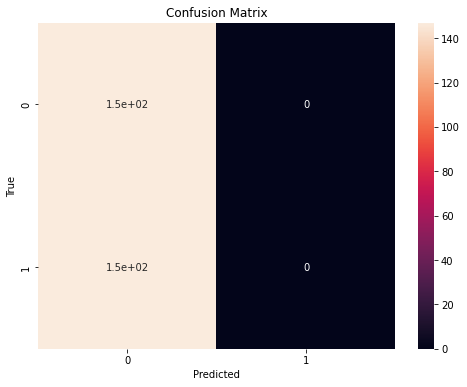

In [132]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix1, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [32]:
cl_report = classification_report(y_test, predictions1)
print(cl_report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       147
           1       0.00      0.00      0.00       147

    accuracy                           0.50       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.25      0.50      0.33       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## VGG16

In [133]:
preprocess_input = vgg16.preprocess_input

train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=294
)

val_generator2 = val_datagen2.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [134]:
vgg16_model = vgg16.VGG16(input_shape=(224, 224, 3), include_top=False)

for layer in vgg16_model.layers:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [135]:
last_layer = vgg16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [136]:
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)                
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(vgg16_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [137]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
mc2 = ModelCheckpoint(filepath="Model2_Best.h5", monitor="val_accuracy", save_best_only= True)

In [139]:
history2 = model2.fit(
    train_generator2, epochs=25, verbose=2, callbacks=[es, mc2], 
    validation_data=val_generator2, validation_steps=10) 

Epoch 1/25
8/8 - 49s - loss: 3.0656 - accuracy: 0.5361 - val_loss: 1.7132 - val_accuracy: 0.5300 - 49s/epoch - 6s/step
Epoch 2/25
8/8 - 14s - loss: 1.3225 - accuracy: 0.5446 - val_loss: 1.3083 - val_accuracy: 0.4800 - 14s/epoch - 2s/step
Epoch 3/25
8/8 - 14s - loss: 0.8243 - accuracy: 0.5855 - val_loss: 0.8323 - val_accuracy: 0.5000 - 14s/epoch - 2s/step
Epoch 4/25
8/8 - 15s - loss: 0.6850 - accuracy: 0.6088 - val_loss: 0.7591 - val_accuracy: 0.5400 - 15s/epoch - 2s/step
Epoch 5/25
8/8 - 15s - loss: 0.6518 - accuracy: 0.6182 - val_loss: 0.7083 - val_accuracy: 0.5600 - 15s/epoch - 2s/step
Epoch 6/25
8/8 - 15s - loss: 0.6232 - accuracy: 0.6322 - val_loss: 0.6932 - val_accuracy: 0.5800 - 15s/epoch - 2s/step
Epoch 7/25
8/8 - 14s - loss: 0.6194 - accuracy: 0.6454 - val_loss: 0.7114 - val_accuracy: 0.4900 - 14s/epoch - 2s/step
Epoch 8/25
8/8 - 14s - loss: 0.6007 - accuracy: 0.6654 - val_loss: 0.7109 - val_accuracy: 0.5400 - 14s/epoch - 2s/step
Epoch 9/25
8/8 - 15s - loss: 0.5899 - accuracy: 

In [140]:
model2.evaluate(train_generator2)
model2.evaluate(val_generator2)

30/30 [==============================] - 3s 100ms/step - loss: 0.6778 - accuracy: 0.6803


[0.6778238415718079, 0.680272102355957]

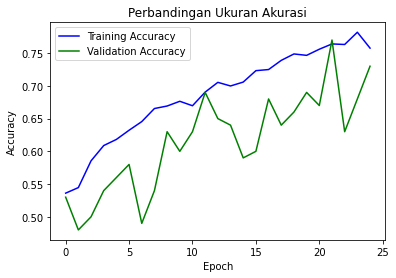

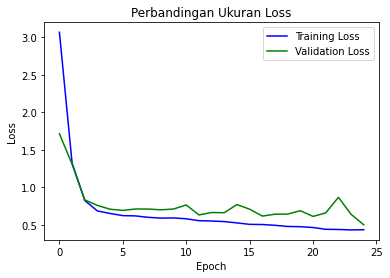

<Figure size 432x288 with 0 Axes>

In [144]:
# Plot the results
epochs = range(len(history2.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history2.history['loss'], label='Training Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving Autistic.4.jpg to Autistic.4 (3).jpg
Autistic


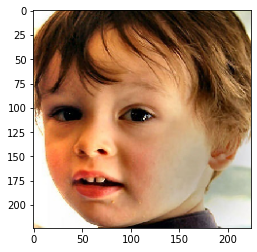

In [146]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model2.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [147]:
## change model
pred2 = model2.predict(X)
threshold = 0.5
predictions2 = np.where(pred2 > threshold, 1,0)

In [148]:
cn_matrix2= confusion_matrix(y_test, predictions2)
cn_matrix2

array([[ 51,  96],
       [108,  39]])

Text(0.5, 1.0, 'Confusion Matrix')

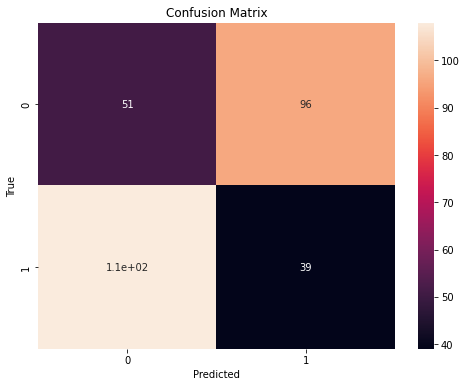

In [149]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix2, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [150]:
cl_report = classification_report(y_test, predictions2)
print(cl_report)

              precision    recall  f1-score   support

           0       0.32      0.35      0.33       147
           1       0.29      0.27      0.28       147

    accuracy                           0.31       294
   macro avg       0.30      0.31      0.30       294
weighted avg       0.30      0.31      0.30       294



##VGG19

In [151]:
preprocess_input2 = vgg19.preprocess_input

train_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)
val_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)

train_generator3 = train_datagen3.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=294
)

val_generator3 = val_datagen3.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [152]:
vgg19_model = vgg19.VGG19(input_shape=(224, 224, 3), include_top=False)

for layer in vgg19_model.layers:
  layer.trainable = False
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [153]:
last_layer2 = vgg19_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer2.output_shape)
last_output2 = last_layer2.output

last layer output shape:  (None, 7, 7, 512)


In [154]:
x2 = tf.keras.layers.GlobalMaxPooling2D()(last_output2)
x2 = tf.keras.layers.Dense(64, activation='relu')(x2)
x2 = tf.keras.layers.Flatten()(x2)
x2 = tf.keras.layers.Dropout(0.5)(x2)
x2 = tf.keras.layers.Dense(512, activation='relu')(x2)                
x2 = tf.keras.layers.Dense(1, activation='sigmoid')(x2)           

# Append the dense network to the base model
model3 = Model(vgg19_model.input, x2)     

# Print the model summary. See your dense network connected at the end.
model3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [155]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [156]:
mc3 = ModelCheckpoint(filepath="Model3_Best.h5", monitor="val_accuracy", save_best_only= True)

In [157]:
history3 = model3.fit(
    train_generator3, epochs=25, verbose=2, callbacks=[es, mc3], 
    validation_data=val_generator3, validation_steps=10) 

Epoch 1/25
8/8 - 18s - loss: 3.5407 - accuracy: 0.4987 - val_loss: 1.6304 - val_accuracy: 0.5300 - 18s/epoch - 2s/step
Epoch 2/25
8/8 - 17s - loss: 1.2247 - accuracy: 0.5740 - val_loss: 1.0338 - val_accuracy: 0.5200 - 17s/epoch - 2s/step
Epoch 3/25
8/8 - 17s - loss: 0.9035 - accuracy: 0.5757 - val_loss: 0.7445 - val_accuracy: 0.6000 - 17s/epoch - 2s/step
Epoch 4/25
8/8 - 17s - loss: 0.7068 - accuracy: 0.5991 - val_loss: 0.6595 - val_accuracy: 0.6100 - 17s/epoch - 2s/step
Epoch 5/25
8/8 - 17s - loss: 0.6600 - accuracy: 0.5816 - val_loss: 0.6666 - val_accuracy: 0.5700 - 17s/epoch - 2s/step
Epoch 6/25
8/8 - 17s - loss: 0.6397 - accuracy: 0.6233 - val_loss: 0.6417 - val_accuracy: 0.6100 - 17s/epoch - 2s/step
Epoch 7/25
8/8 - 17s - loss: 0.6362 - accuracy: 0.6271 - val_loss: 0.6618 - val_accuracy: 0.5900 - 17s/epoch - 2s/step
Epoch 8/25
8/8 - 17s - loss: 0.6340 - accuracy: 0.6378 - val_loss: 0.6213 - val_accuracy: 0.6400 - 17s/epoch - 2s/step
Epoch 9/25
8/8 - 17s - loss: 0.5928 - accuracy: 

In [158]:
model3.evaluate(train_generator3)
model3.evaluate(val_generator3)

30/30 [==============================] - 3s 82ms/step - loss: 0.6303 - accuracy: 0.6803


[0.6303423643112183, 0.680272102355957]

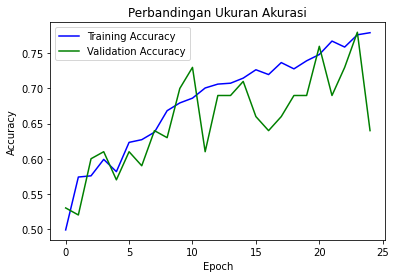

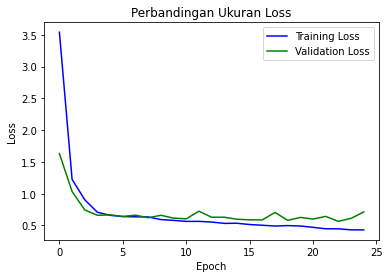

<Figure size 432x288 with 0 Axes>

In [160]:
# Plot the results
epochs = range(len(history3.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history3.history['loss'], label='Training Loss', color='blue')
plt.plot(history3.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 0026.jpg to 0026.jpg
Non_Autistic


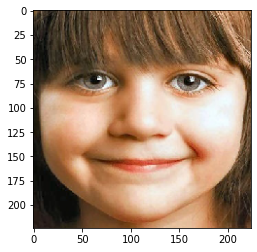

In [216]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model3.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [162]:
## change model
pred3 = model3.predict(X)
threshold = 0.5
predictions3 = np.where(pred3 > threshold, 1,0)

In [163]:
cn_matrix3= confusion_matrix(y_test, predictions3)
cn_matrix3

array([[ 63,  84],
       [114,  33]])

Text(0.5, 1.0, 'Confusion Matrix')

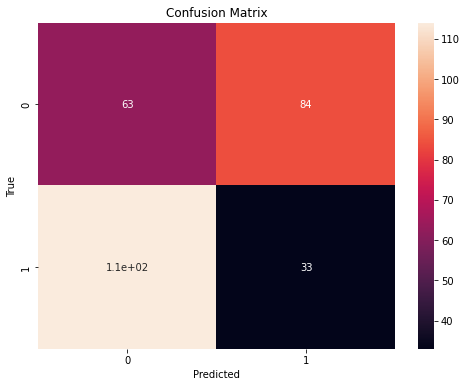

In [164]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix3, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [165]:
cl_report = classification_report(y_test, predictions3)
print(cl_report)

              precision    recall  f1-score   support

           0       0.36      0.43      0.39       147
           1       0.28      0.22      0.25       147

    accuracy                           0.33       294
   macro avg       0.32      0.33      0.32       294
weighted avg       0.32      0.33      0.32       294



## Efficient Net B0

In [166]:
preprocess_input3 = efficientnet.preprocess_input

train_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)
val_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)

train_generator4 = train_datagen4.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=294
)

val_generator4 = val_datagen4.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [167]:
en_model = efficientnet.EfficientNetB0(input_shape=(224, 224, 3), include_top=False)

for layer in en_model.layers:
  layer.trainable = False
en_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [168]:
last_layer3 = en_model.get_layer('top_conv')
print('last layer output shape: ', last_layer3.output_shape)
last_output3 = last_layer3.output

last layer output shape:  (None, 7, 7, 1280)


In [170]:
x3 = tf.keras.layers.GlobalMaxPooling2D()(last_output3)
x3 = tf.keras.layers.Dense(64, activation='relu')(x3)
x3 = tf.keras.layers.Flatten()(x3)
x3 = tf.keras.layers.Dropout(0.5)(x3)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)                
x3 = tf.keras.layers.Dense(1, activation='sigmoid')(x3)           

# Append the dense network to the base model
model4 = Model(en_model.input, x3)    

# Print the model summary. See your dense network connected at the end.
model4.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [171]:
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
mc4 = ModelCheckpoint(filepath="Model4_Best.h5", monitor="val_accuracy", save_best_only= True)

In [173]:
history4 = model4.fit(
    train_generator4, epochs=25, verbose=2, callbacks=[es, mc4], 
    validation_data=val_generator4, validation_steps=10) 

Epoch 1/25
8/8 - 19s - loss: 1.4198 - accuracy: 0.5327 - val_loss: 0.8307 - val_accuracy: 0.4100 - 19s/epoch - 2s/step
Epoch 2/25
8/8 - 10s - loss: 0.7150 - accuracy: 0.4957 - val_loss: 0.6940 - val_accuracy: 0.5100 - 10s/epoch - 1s/step
Epoch 3/25
8/8 - 9s - loss: 0.6896 - accuracy: 0.5017 - val_loss: 0.6846 - val_accuracy: 0.4700 - 9s/epoch - 1s/step
Epoch 4/25
8/8 - 9s - loss: 0.6886 - accuracy: 0.4996 - val_loss: 0.6702 - val_accuracy: 0.5100 - 9s/epoch - 1s/step
Epoch 5/25
8/8 - 10s - loss: 0.6763 - accuracy: 0.5425 - val_loss: 0.6667 - val_accuracy: 0.6700 - 10s/epoch - 1s/step
Epoch 6/25
8/8 - 9s - loss: 0.6646 - accuracy: 0.6016 - val_loss: 0.6425 - val_accuracy: 0.6600 - 9s/epoch - 1s/step
Epoch 7/25
8/8 - 9s - loss: 0.6704 - accuracy: 0.5710 - val_loss: 0.6626 - val_accuracy: 0.6700 - 9s/epoch - 1s/step
Epoch 8/25
8/8 - 9s - loss: 0.6548 - accuracy: 0.6084 - val_loss: 0.6401 - val_accuracy: 0.6100 - 9s/epoch - 1s/step
Epoch 9/25
8/8 - 9s - loss: 0.6564 - accuracy: 0.6012 - va

In [174]:
model4.evaluate(train_generator4)
model4.evaluate(val_generator4)

30/30 [==============================] - 2s 54ms/step - loss: 0.6116 - accuracy: 0.6939


[0.611576497554779, 0.6938775777816772]

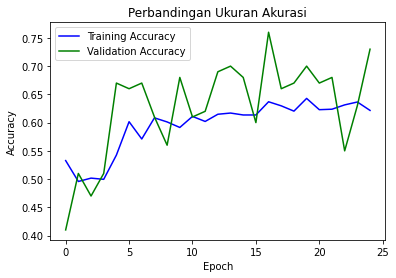

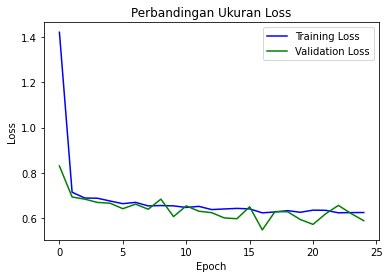

<Figure size 432x288 with 0 Axes>

In [176]:
# Plot the results
epochs = range(len(history4.history['accuracy']))


#Plot training and validation accuracy per epoch
plt.plot(epochs, history4.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history4.history['loss'], label='Training Loss', color='blue')
plt.plot(history4.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 0026.jpg to 0026 (1).jpg
Non_Autistic


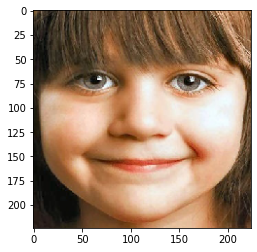

In [217]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model4.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [179]:
## change model
pred4 = model4.predict(X)
threshold = 0.5
predictions4 = np.where(pred4 > threshold, 1,0)

In [180]:
cn_matrix4= confusion_matrix(y_test, predictions4)
cn_matrix4

array([[ 41, 106],
       [117,  30]])

Text(0.5, 1.0, 'Confusion Matrix')

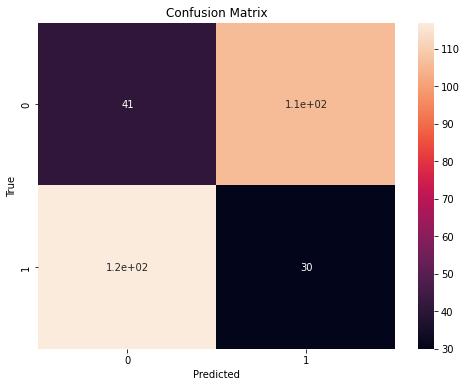

In [181]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix4, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [182]:
cl_report = classification_report(y_test, predictions4)
print(cl_report)

              precision    recall  f1-score   support

           0       0.26      0.28      0.27       147
           1       0.22      0.20      0.21       147

    accuracy                           0.24       294
   macro avg       0.24      0.24      0.24       294
weighted avg       0.24      0.24      0.24       294



## Mobile Net

In [183]:
preprocess_input4 = mobilenet.preprocess_input

train_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)
val_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)

train_generator5 = train_datagen5.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=294
)

val_generator5 = val_datagen5.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [184]:
mn_model = mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False)

for layer in mn_model.layers:
  layer.trainable = False
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [185]:
last_layer4 = mn_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer4.output_shape)
last_output4 = last_layer4.output

last layer output shape:  (None, 7, 7, 1024)


In [189]:
x4 = tf.keras.layers.GlobalMaxPooling2D()(last_output4)
x4 = tf.keras.layers.Dense(64, activation='relu')(x4)
x4 = tf.keras.layers.Flatten()(x4)
x4 = tf.keras.layers.Dropout(0.5)(x4)
x4 = tf.keras.layers.Dense(512, activation='relu')(x4)                
x4 = tf.keras.layers.Dense(1, activation='sigmoid')(x4)           

# Append the dense network to the base model
model5 = Model(mn_model.input, x4)    

# Print the model summary. See your dense network connected at the end.
model5.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [190]:
model5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
mc5 = ModelCheckpoint(filepath="Model5_Best.h5", monitor="val_accuracy", save_best_only= True)

In [192]:
history5 = model5.fit(
    train_generator5, epochs=25, verbose=2, callbacks=[es, mc5], 
    validation_data=val_generator5, validation_steps=10)

Epoch 1/25
8/8 - 12s - loss: 0.9739 - accuracy: 0.5255 - val_loss: 0.6997 - val_accuracy: 0.5200 - 12s/epoch - 2s/step
Epoch 2/25
8/8 - 9s - loss: 0.7002 - accuracy: 0.5264 - val_loss: 0.6975 - val_accuracy: 0.5000 - 9s/epoch - 1s/step
Epoch 3/25
8/8 - 9s - loss: 0.6682 - accuracy: 0.5706 - val_loss: 0.6682 - val_accuracy: 0.5600 - 9s/epoch - 1s/step
Epoch 4/25
8/8 - 9s - loss: 0.6386 - accuracy: 0.6025 - val_loss: 0.6437 - val_accuracy: 0.6400 - 9s/epoch - 1s/step
Epoch 5/25
8/8 - 9s - loss: 0.6152 - accuracy: 0.6518 - val_loss: 0.6210 - val_accuracy: 0.6800 - 9s/epoch - 1s/step
Epoch 6/25
8/8 - 9s - loss: 0.5851 - accuracy: 0.6837 - val_loss: 0.5943 - val_accuracy: 0.6700 - 9s/epoch - 1s/step
Epoch 7/25
8/8 - 9s - loss: 0.5686 - accuracy: 0.7054 - val_loss: 0.6167 - val_accuracy: 0.6500 - 9s/epoch - 1s/step
Epoch 8/25
8/8 - 9s - loss: 0.5635 - accuracy: 0.6998 - val_loss: 0.5894 - val_accuracy: 0.6800 - 9s/epoch - 1s/step
Epoch 9/25
8/8 - 9s - loss: 0.5496 - accuracy: 0.7168 - val_lo

In [193]:
model5.evaluate(train_generator5)
model5.evaluate(val_generator5)

30/30 [==============================] - 2s 49ms/step - loss: 0.5020 - accuracy: 0.7687


[0.5019953846931458, 0.7687074542045593]

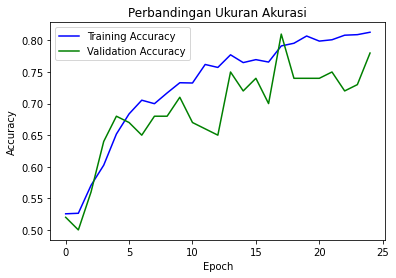

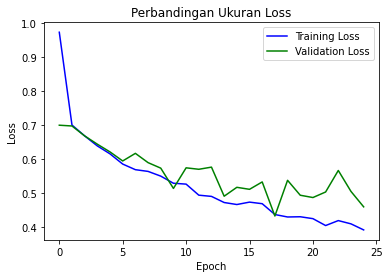

<Figure size 432x288 with 0 Axes>

In [194]:
# Plot the results
epochs = range(len(history5.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history5.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history5.history['loss'], label='Training Loss', color='blue')
plt.plot(history5.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 0026.jpg to 0026 (2).jpg
Autistic


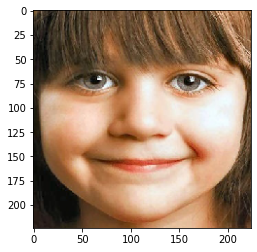

In [218]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model5.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [196]:
## change model
pred5 = model5.predict(X)
threshold = 0.5
predictions5 = np.where(pred5 > threshold, 1,0)

In [197]:
cn_matrix5= confusion_matrix(y_test, predictions5)
cn_matrix5

array([[147,   0],
       [147,   0]])

Text(0.5, 1.0, 'Confusion Matrix')

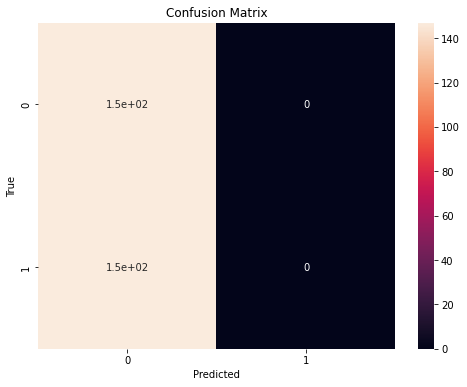

In [198]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix5, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [92]:
cl_report = classification_report(y_test, predictions5)
print(cl_report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       147
           1       0.00      0.00      0.00       147

    accuracy                           0.50       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.25      0.50      0.33       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Inception V3

In [199]:
preprocess_input5 = inception_v3.preprocess_input

train_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)
val_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)

train_generator6 = train_datagen6.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=294
)

val_generator6 = val_datagen6.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [200]:
inc_model = inception_v3.InceptionV3(input_shape=(224, 224, 3), include_top=False)

for layer in inc_model.layers:
  layer.trainable = False
inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_100 (Conv2D)            (None, 111, 111, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_100[0][0]']             
 ormalization)                  )                                                      

In [201]:
last_layer5 = inc_model.get_layer('mixed10')
print('last layer output shape: ', last_layer5.output_shape)
last_output5 = last_layer5.output

last layer output shape:  (None, 5, 5, 2048)


In [203]:
x5 = tf.keras.layers.GlobalMaxPooling2D()(last_output5)
x5 = tf.keras.layers.Dense(64, activation='relu')(x5)
x5 = tf.keras.layers.Flatten()(x5)
x5 = tf.keras.layers.Dropout(0.5)(x5)
x5 = tf.keras.layers.Dense(512, activation='relu')(x5)                
x5 = tf.keras.layers.Dense(1, activation='sigmoid')(x5)           

# Append the dense network to the base model
model6 = Model(inc_model.input, x5)    

# Print the model summary. See your dense network connected at the end.
model6.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_100 (Conv2D)            (None, 111, 111, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_100[0][0]']             
 ormalization)                  )                                                           

In [204]:
model6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
mc6 = ModelCheckpoint(filepath="Model6_Best.h5", monitor="val_accuracy", save_best_only= True)

In [206]:
history6 = model6.fit(
    train_generator6, epochs=25, verbose=2, callbacks=[es, mc6], 
    validation_data=val_generator6, validation_steps=10)

Epoch 1/25
8/8 - 24s - loss: 0.8082 - accuracy: 0.5327 - val_loss: 0.7188 - val_accuracy: 0.4800 - 24s/epoch - 3s/step
Epoch 2/25
8/8 - 11s - loss: 0.6767 - accuracy: 0.5719 - val_loss: 0.6530 - val_accuracy: 0.6500 - 11s/epoch - 1s/step
Epoch 3/25
8/8 - 10s - loss: 0.6542 - accuracy: 0.6199 - val_loss: 0.6543 - val_accuracy: 0.5900 - 10s/epoch - 1s/step
Epoch 4/25
8/8 - 11s - loss: 0.6234 - accuracy: 0.6514 - val_loss: 0.5813 - val_accuracy: 0.7400 - 11s/epoch - 1s/step
Epoch 5/25
8/8 - 10s - loss: 0.5873 - accuracy: 0.6926 - val_loss: 0.5969 - val_accuracy: 0.6900 - 10s/epoch - 1s/step
Epoch 6/25
8/8 - 10s - loss: 0.5748 - accuracy: 0.6930 - val_loss: 0.6146 - val_accuracy: 0.6700 - 10s/epoch - 1s/step
Epoch 7/25
8/8 - 10s - loss: 0.5459 - accuracy: 0.7130 - val_loss: 0.5206 - val_accuracy: 0.7400 - 10s/epoch - 1s/step
Epoch 8/25
8/8 - 10s - loss: 0.5345 - accuracy: 0.7275 - val_loss: 0.5443 - val_accuracy: 0.7400 - 10s/epoch - 1s/step
Epoch 9/25
8/8 - 11s - loss: 0.5195 - accuracy: 

In [207]:
model6.evaluate(train_generator6)
model6.evaluate(val_generator6)

30/30 [==============================] - 2s 77ms/step - loss: 0.4899 - accuracy: 0.7755


[0.4898608922958374, 0.7755101919174194]

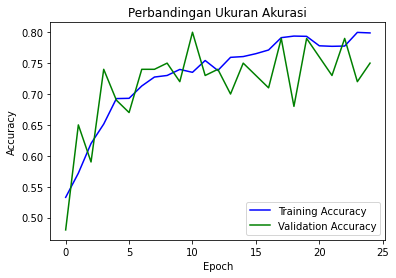

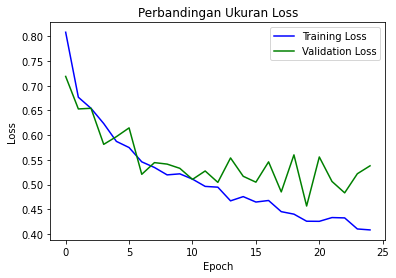

<Figure size 432x288 with 0 Axes>

In [208]:
# Plot the results
epochs = range(len(history6.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history6.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history6.history['loss'], label='Training Loss', color='blue')
plt.plot(history6.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 0026.jpg to 0026 (3).jpg
Autistic


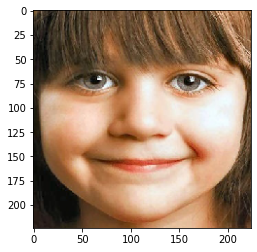

In [219]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model6.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [210]:
## change model
pred6 = model6.predict(X)
threshold = 0.5
predictions6 = np.where(pred6 > threshold, 1,0)

In [211]:
cn_matrix6= confusion_matrix(y_test, predictions6)
cn_matrix6

array([[147,   0],
       [147,   0]])

Text(0.5, 1.0, 'Confusion Matrix')

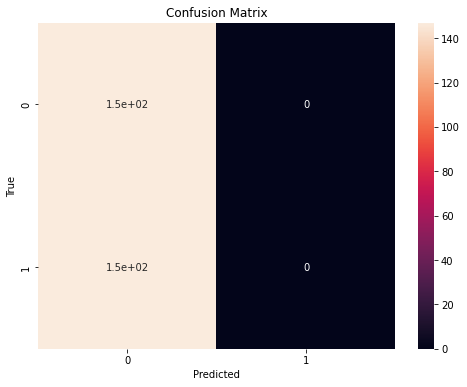

In [212]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix6, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [213]:
cl_report = classification_report(y_test, predictions6)
print(cl_report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       147
           1       0.00      0.00      0.00       147

    accuracy                           0.50       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.25      0.50      0.33       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Deployment

In [222]:
model_path = tempfile.gettempdir()

version = 1
export_model = os.path.join(model_path, str(version))

if os.path.isdir(export_model):
    print('\nPath already exist')
    !rm -r {export_model}

model5.save(export_model, save_format="tf")

print('\nexport_model = {}'.format(export_model))
!ls -l {export_model}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_model = /tmp/1
total 1540
drwxr-xr-x 2 root root    4096 May 30 17:17 assets
-rw-r--r-- 1 root root  192231 May 30 17:17 keras_metadata.pb
-rw-r--r-- 1 root root 1372620 May 30 17:17 saved_model.pb
drwxr-xr-x 2 root root    4096 May 30 17:17 variables


In [224]:
tf_converter = tf.lite.TFLiteConverter.from_saved_model(export_model)
tf_converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [226]:
tflite_convert = tf_converter.convert()
tflite_file = 'mobilenet_01.tflite'
with open(tflite_file, 'wb') as x:
  x.write(tflite_convert)